<a href="https://www.kaggle.com/code/ayushs9020/benefits-of-the-data?scriptVersionId=139875914" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC67D; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC67D">Meta Kaggle Code | Benefits</p>

<div style="border-radius:10px; border:#FFC67D solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
$Kaggle$ recently released their `successor` to **[Meta Kaggle](https://www.kaggle.com/datasets/kaggle/meta-kaggle)**. This `dataset` `contains` the `notebook contents` of `possibly` `all` the `notebooks` on $Kaggle$, which `costs` a `lot` while `scraping`/`specially processing` it to make it an `accessible dataset` to the $Kagglers$. 

**First thanks to the [Kaggle Team](https://www.kaggle.com/kaggleteam) to make this quality data available to everyone** 

At `first` when I saw the data. I didnt really `understood` the `benefits of the data`, like `how it will be benefical ? `/`what are the use cases ?`, after some time, I found some. One of the reason that the `data is beneficial` is the `helping`/`supporting`/`teaching` `nature` of the $Kaggle$ $Community$ as a whole. This nature `allows simple explanations` to `complex code` `sturctures`/`classes`/`functions`/`pipelines`. This can help `making chatbots` which `might answer code` when `given a prompt`. **Again this is just my assumption/kind of goal for the data**
    
Further versions of the notebooks will contain some preprocessing of the major projects I am thinking of 

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#32CD32; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #32CD32">1 | Data Preprocessing 🔍</p>

In [1]:
import tqdm
import os 
import glob

<div style="border-radius:10px; border:#32CD32 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

First we will iterate through all the sample files and make a list which will contain all the file names. We will limit our scope till first $100$ files

In [2]:
folder_list = (glob.glob('/kaggle/input/meta-kaggle-code/**/**'))
# folder_list.reverse()
folder_list = folder_list[:10000]

In [3]:
file_list = []

for file in tqdm.tqdm(folder_list , total = len(folder_list) , desc = 'Adding Files --->'):
    x_file = os.listdir(file)
    for file_n in x_file:
        file_list.append(str(file) + '/' + str(file_n))

Adding Files --->: 100%|██████████| 10000/10000 [01:51<00:00, 89.70it/s] 


In [4]:
file_list = sorted(file_list)

<div style="border-radius:10px; border:#32CD32 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will make $3$ Seperate lists that will store the respective files

In [5]:
ipynb_list = []
r_list = []
py_list = []

In [6]:
for file in tqdm.tqdm(file_list , total = len(file_list) , desc = 'Seperating Files --->'):
    if file.split('.')[1] == 'ipynb':ipynb_list.append(file)
    elif file.split('.')[1] == 'r': r_list.append(file)
    else : py_list.append(file)

Seperating Files --->: 100%|██████████| 223270/223270 [00:00<00:00, 821417.77it/s]


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00B9F7; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00B9F7">2 | Data Visualization 📊 </p>

In [7]:
import matplotlib.pyplot as plt 

<div style="border-radius:10px; border:#00B9F7 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets see how much files we have of each section

Text(0.5, 1.0, 'File Number Distribution')

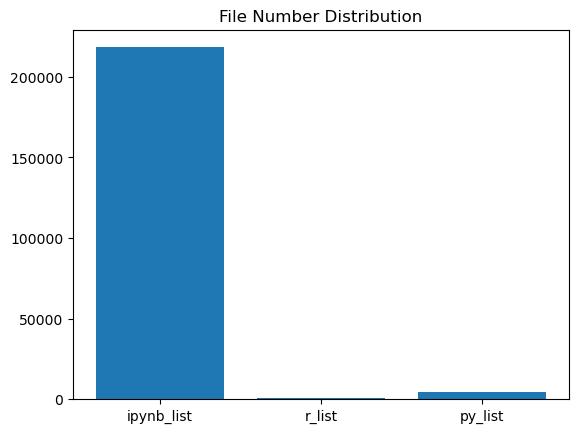

In [8]:
plt.bar(
    ['ipynb_list' , 'r_list' , 'py_list'] , 
    [len(ipynb_list) , len(r_list) , len(py_list)]
)

plt.title('File Number Distribution')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">3 | Kaggle Library Trends 📍</p>

In [9]:
import json
import dateutil.parser
import pandas as pd 
import numpy as np
import re

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
## $Extract$ $Libraries$
```
def display_file(file_path):
    '''
    Displays the file in a str format
    
    Arg : file_path - path to the file 
    Returns - Dictionary with file info
    '''

    if file_path.split('.')[-1] == 'ipynb' :
        try : 
            with open(file_path , 'r') as file:
                content = file.read()
                content = json.loads(content)

                cells = content['cells']

                codes = [
                    cell['source']
                    for cell in cells 
                    if cell['cell_type'] == 'code']
                markdowns = [
                    cell['source']
                    for cell in cells 
                    if cell['cell_type'] == 'markdown']
                
                codes = ' '.join(codes)
                markdowns = ' '.join(markdowns)
  
                libraries = set(re.findall(r'import\s+(\w+)', codes))
```

## $Information$ $Extractor$
```
year = float('nan')
for cell in cells:
    if cell['cell_type'] == 'code':
        if 'execution' in cell['metadata'].keys():
            year = list(cell['metadata']['execution'].values())[0]
            year = dateutil.parser.parse(year)
            break  
```

## $Return$
```
        return {
            'path' : file_path 
            'libraries' : libraries , 
            'n_codes' : len(codes) , 
            'n_markdowns' : len(markdowns) , 
            'date_time' : year}

except Exception as e : return {
    'path' : file_path
    'libraries' : [] , 
    'n_codes' : float('nan') , 
    'n_markdowns' : float('nan') , 
    'date_time' : float('nan')}
```

* `Return` `Dictionary` containing three `keys` - `libraries`/`sub-libraries`/`date-time`.

In [10]:
def display_file(file_path):
    '''
    Displays the file in a str format
    
    Arg : file_path - path to the file 
    Returns - Dictionary with file info
    '''

    if file_path.split('.')[-1] == 'ipynb' :
        try : 
            with open(file_path , 'r') as file:
                content = file.read()
                content = json.loads(content)

                cells = content['cells']

                codes = [
                    cell['source']
                    for cell in cells 
                    if cell['cell_type'] == 'code']
                markdowns = [
                    cell['source']
                    for cell in cells 
                    if cell['cell_type'] == 'markdown']
                
                codes = ' '.join(codes)
                markdowns = ' '.join(markdowns)
  
                libraries = set(re.findall(r'import\s+(\w+)', codes))
                
                year = float('nan')
                for cell in cells:
                    if cell['cell_type'] == 'code':
                        if 'execution' in cell['metadata'].keys():
                            year = list(cell['metadata']['execution'].values())[0]
                            year = dateutil.parser.parse(year)
                            break                

                return {
                    'path' : file_path ,  
                    'libraries' : libraries , 
                    'n_codes' : len(codes) , 
                    'n_markdowns' : len(markdowns) , 
                    'date_time' : year}
        
        except Exception as e : return {
            'path' : file_path , 
            'libraries' : [] , 
            'n_codes' : float('nan') , 
            'n_markdowns' : float('nan') , 
            'date_time' : float('nan')}

In [11]:
info_list = np.empty(shape = len(ipynb_list) , dtype = np.ndarray)

In [12]:
for index , path in tqdm.tqdm(enumerate(ipynb_list) , total = len(ipynb_list)):
    info_list[index] = display_file(path)

100%|██████████| 218335/218335 [33:09<00:00, 109.74it/s]


In [13]:
data = pd.DataFrame({
    'libraries' : [list(val['libraries']) for val in info_list] , 
    'n_codes' : [val['n_codes'] for val in info_list] , 
    'n_markdowns' : [val['n_markdowns'] for val in info_list] , 
    'date_time' : [val['date_time'] for val in info_list]
})

data.dropna(inplace = True)

In [14]:
data.to_csv('/kaggle/working/Trends Over Time.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">4 | Ending 🏁</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE $:)$**
    
<img src = "https://i.imgflip.com/19aadg.jpg">
   
**PEACE OUT**